In [29]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from pulsedjax.simulate_trace import MakeTrace, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


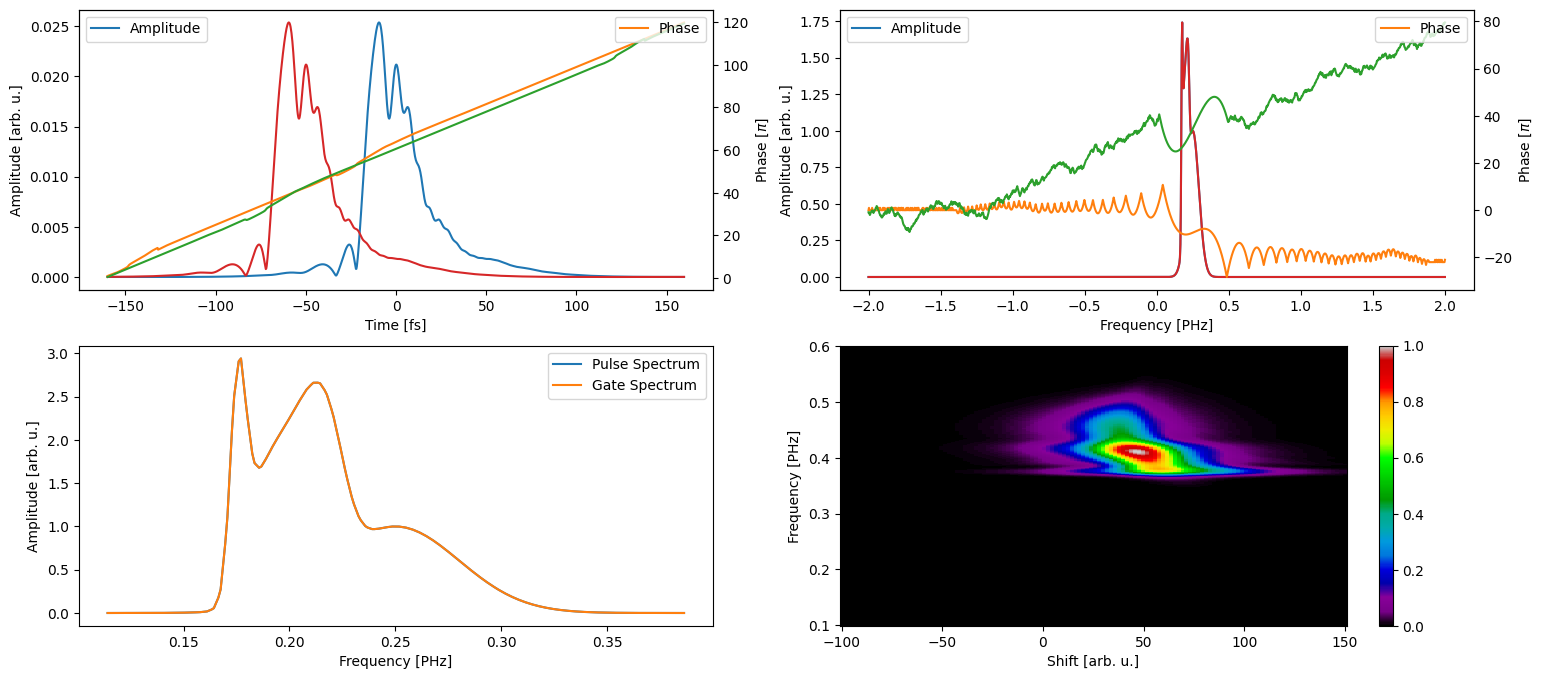

In [35]:
from pulsedjax.simulate_trace import MakeTrace
from pulsedjax.simulate_trace import GaussianAmplitude, PolynomialPhase
import jax.numpy as jnp

amp0 = GaussianAmplitude((1,1,1), (0.175,0.2,0.25), (0.01,0.05,0.1), (1,2,1))
phase0 = PolynomialPhase(None, (0,10,20,-30))
phase1 = PolynomialPhase(None, (0,60,20,-30))

mp = MakeTrace(N=128*10, f_max=2)
time, pulse_t, frequency, pulse_f = mp.generate_pulse((amp0,phase0))

_, _, frequency_gate, pulse_f_gate = mp.generate_pulse((amp0,phase1))


# import refractiveindex
# parameters = refractiveindex.RefractiveIndexMaterial(shelf="main", book="SiO2", page="Malitson")
# z_arr = jnp.linspace(-5,5,128) 
# z_arr, frequency_trace, trace, spectra = mp.generate_chirpscan(time, frequency, pulse_t, pulse_f, "shg", 
#                                                                z_arr, phase_type="material", parameters=parameters,
#                                                                frequency_range=(0.1,0.65), N=128)


from pulsedjax import get_spectral_filter

spectral_filter = get_spectral_filter("lorentzian", frequency, (1,0.2,0.01,1), material_thickness=2)


delay = jnp.linspace(-100,150,128) 
delay, frequency_trace, trace, spectra = mp.generate_tdp(time, frequency, pulse_t, pulse_f, "shg", delay, spectral_filter,
                                                         frequency_range=(0.1,0.6), N=128*2,
                                                         cross_correlation=True, gate=(frequency_gate, pulse_f_gate))


In [36]:
from pulsedjax.utilities import do_interpolation_1d

spectral_filter = do_interpolation_1d(frequency_trace, frequency, spectral_filter)

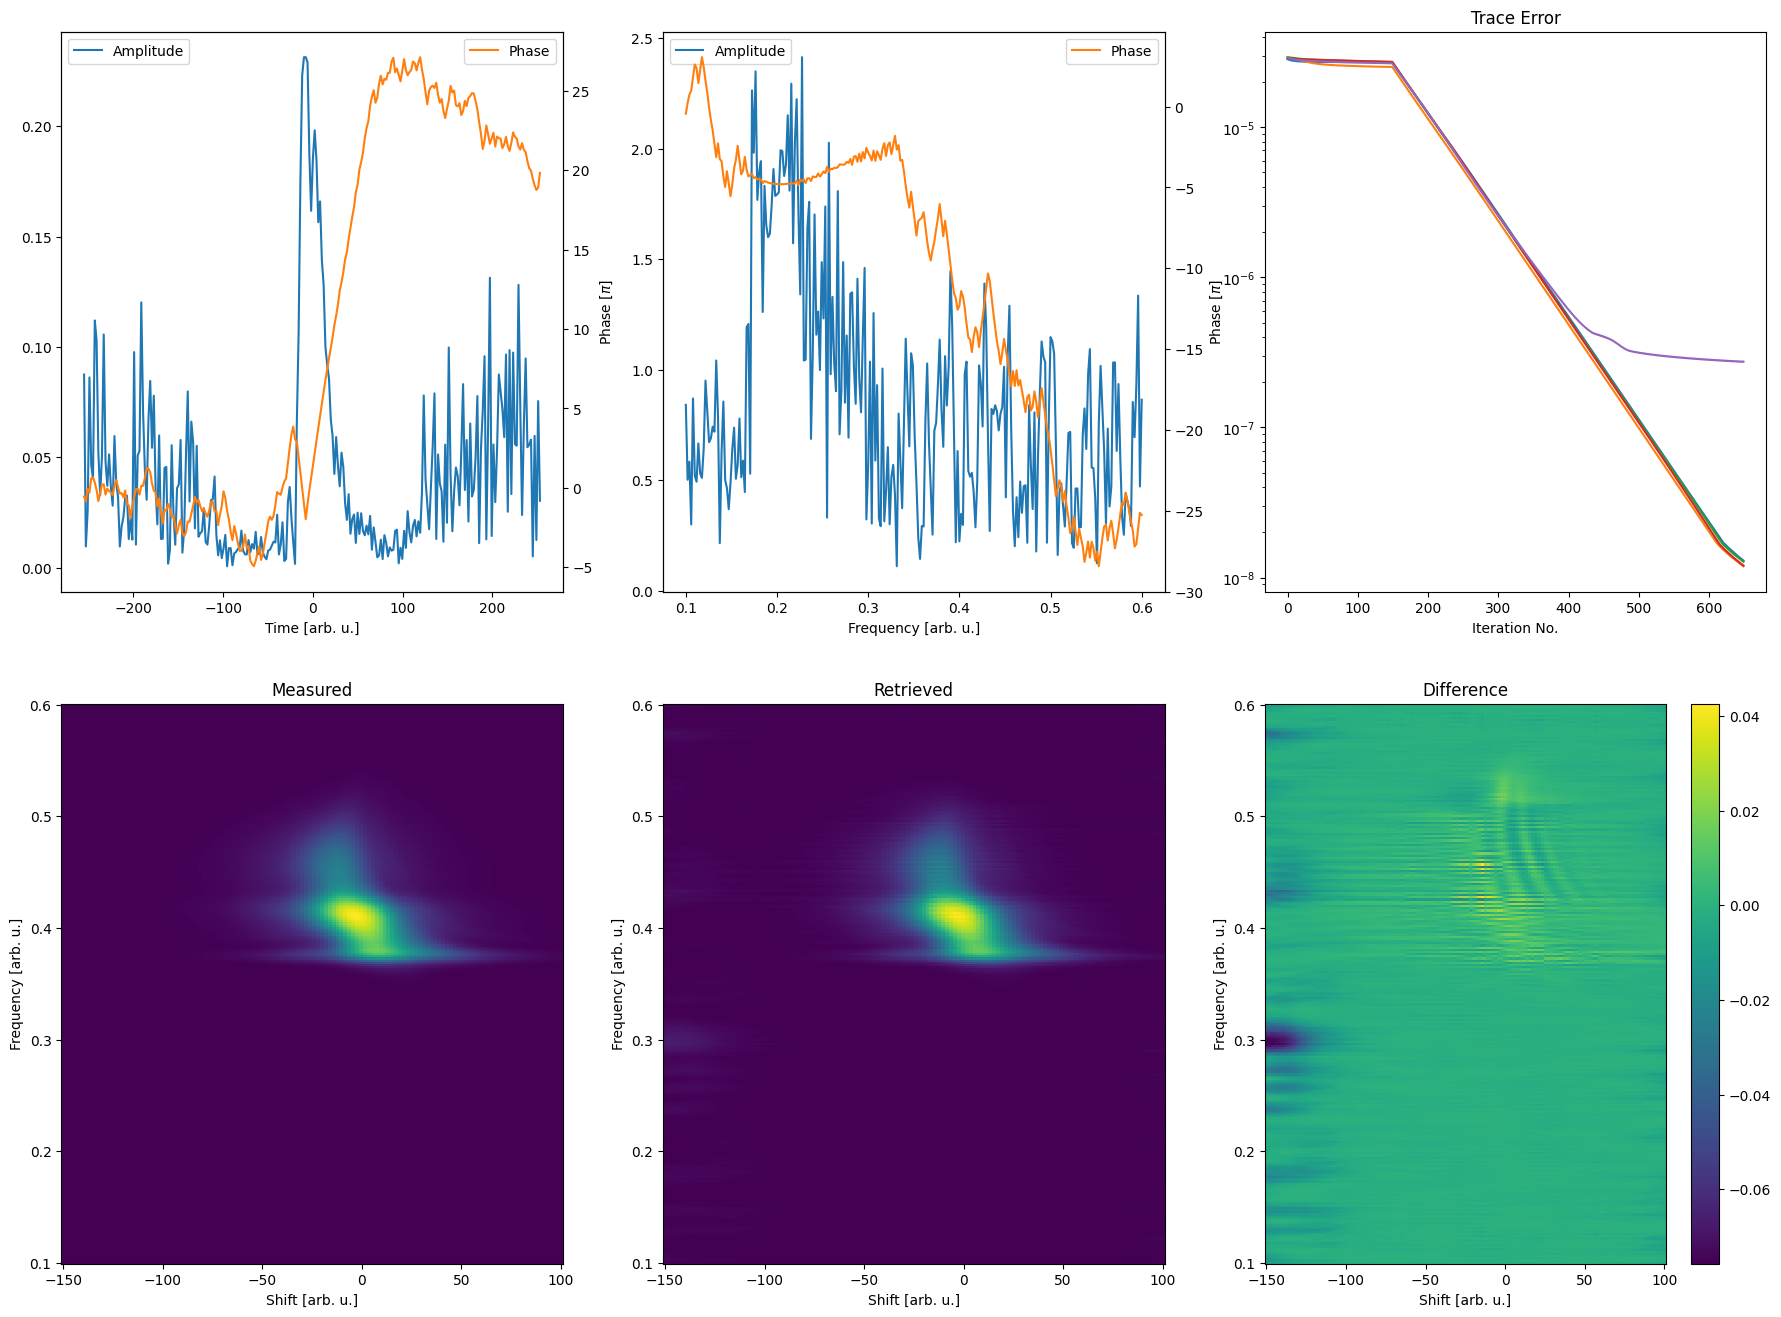

In [ ]:
from pulsedjax.tdp import COPRA

copra = COPRA(delay-50, frequency_trace, trace, "shg", spectral_filter)

population = copra.create_initial_population(5, "random")

copra.local_gamma = 1
copra.global_gamma = 0.25

#copra.xi=1e-8

final_result = copra.run(population, 150, 500)

copra.plot_results(final_result)